In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from  sklearn.metrics import silhouette_score
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('../data.csv', index_col=0)
df_scaled = pd.read_csv('../preprocessed_data.csv', index_col=0)
IDS = df_scaled['ID']

In [4]:
colors = ['deeppink', 'darkgreen', 'brown', 'cyan',
         'grey', 'red', 'blue', 'navy',
         'black', 'orange', 'orchid']

In [4]:
# for link in ['complete', 'average', 'single', 'ward']:
#     for n in range(3, 11):
#         est_agg = AgglomerativeClustering(n_clusters=n, linkage = link, affinity='euclidean')
#         est_agg.fit(df_scaled)
#         df['Labels'] = est_agg.labels_
#         print('-----------------------')
#         print(link)
#         print(n)
#         print(silhouette_score(df_scaled, est_agg.labels_))

In [5]:
position_to_num = {
    'GK': 0.0,
    'CB': 1.0,
    'LCB': 1.2,
    'RCB': 1.6,
    'LB': 2.7,
    'RB': 3.2,
    'LWB': 4.5,
    'RWB': 4.6,
    'CM': 6,
    'LCM': 6.2,
    'RCM': 6.4,
    'CDM': 5,
    'LDM': 5.1,
    'RDM': 5.3,
    'LM': 6.5,
    'RM': 6.7,
    'RAM': 7.3,
    'CAM': 7,
    'LAM': 7.1,
    'LW': 8.2,
    'RW': 8.4,
    'CF': 9.1,
    'LF': 9.2,
    'RF': 9.4,
    'LS': 9.5,
    'RS': 9.7,
    'ST': 10
}
df['Position'].replace(position_to_num, inplace=True)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)
pca_df = pca.fit_transform(df_scaled)
pca.explained_variance_
df_pca = pd.DataFrame(pca_df, columns=['pca1', 'pca2', 'pca3'])

In [9]:
df_without_gk = df_scaled[df_scaled.Position != 0]
df_without_gk.drop(['GKDiving', 'GKReflexes', 'GKHandling', 'GKKicking', 'GKPositioning'],
                   axis=1, inplace=True)


,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,LongOfCountry,LatitOfCountry,ID
0,0.517241,1.000000,0.978723,0.932489,1.000000,0.0,1.00,0.75,0.75,0.904762,...,1.000000,0.804598,1.000000,0.329670,0.285714,0.261364,0.992982,0.166224,0.056089,158023
1,0.586207,1.000000,0.978723,0.649789,0.716814,1.0,1.00,0.75,1.00,1.000000,...,0.857143,0.919540,0.989247,0.274725,0.318681,0.227273,0.556959,0.366432,0.733595,20801
2,0.344828,0.958333,0.957447,1.000000,0.513274,1.0,1.00,1.00,1.00,0.833333,...,0.916667,0.873563,0.978495,0.263736,0.241758,0.340909,1.000000,0.208709,0.278433,190871
4,0.379310,0.937500,0.936170,0.860759,0.628319,1.0,0.75,1.00,0.75,0.476190,...,1.000000,0.850575,0.913978,0.714286,0.615385,0.545455,0.860947,0.410725,0.833022,192985
5,0.379310,0.937500,0.914894,0.784810,0.601770,1.0,0.75,0.75,0.75,0.904762,...,0.940476,0.931034,0.946237,0.340659,0.274725,0.215909,0.754354,0.410725,0.833022,183277


In [51]:
est_agg = AgglomerativeClustering(n_clusters=20, linkage = 'average', affinity='l2')
est_agg.fit(df_without_gk.drop(['ID'], axis=1))
df_without_gk['Labels'] = est_agg.labels_
print(max(est_agg.labels_))
print(silhouette_score(df_without_gk, est_agg.labels_))

/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


19
-0.7112951454137066


/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


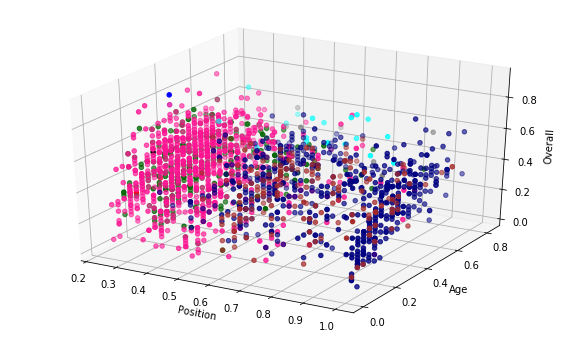

In [54]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')



for i in range(10):
    cluster = df_without_gk.sample(2000)[df_without_gk['Labels'] == i]
#     if i in [1, 2]:
#         print(cluster)
    ax.scatter(cluster['Position'], cluster['Age'], cluster['Overall'],
                   c=colors[i])


ax.set_xlabel('Position')
ax.set_ylabel('Age')
ax.set_zlabel('Overall')
plt.savefig('../agglomerative_20_3d_overall_age_position')

In [33]:
# df[df['ID'] == 190871]